## Download the required libraries
## Загружаем нужные библиотеки:


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Download the dataset:

### Загружаем данные:

In [1]:
from sklearn.datasets import fetch_openml

# Загружаем данные из https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', return_X_y = True, as_frame = False)

In [2]:
N, d = X.shape
N, d

(70000, 784)

In [3]:
28*28

784

In [4]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
y = y.astype('int8')
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

### Let's draw the images:
### Посмотрим на некоторые изображения:

In [ ]:
def draw_digit(Img, digit_true, digit_pred = ''):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(Img, (28, 28)))
    plt.text(0, 27, str(digit_true), color = 'b')
    plt.text(0, 1, str(digit_pred), color = 'r')
    plt.set_cmap('binary')
    #plt.set_cmap('gray')

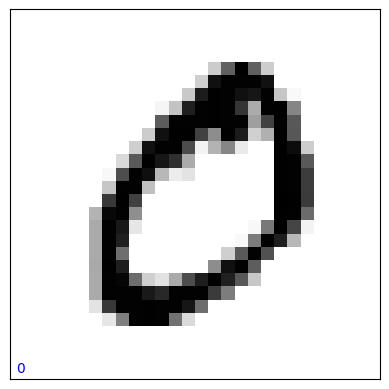

In [ ]:
draw_digit(X[1, :], y[1])

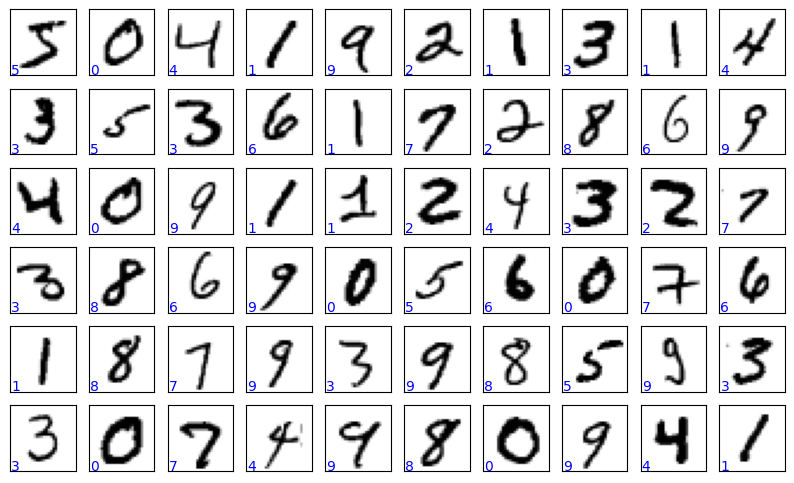

In [ ]:
plt.figure(figsize = (10, 6))
for i_subplot in range(60):
    plt.subplot(6, 10, i_subplot + 1)
    draw_digit(X[i_subplot, :], y[i_subplot])

### Split the dataset onto a train test and a test set

### Разбиваем данные на обучающую и тестовую выборки


In [ ]:
N_test = 10000
N_train = X.shape[0] - N_test

In [ ]:
N_test, N_train

(10000, 60000)

Некоторые методы требуют для обучения много времени. Чтобы долго не ждать, возьмем не все данные, а только часть:

In [ ]:
N_test = 1000
N_train = 6000

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = N_train, test_size = N_test,
                                                    stratify = y, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((6000, 784), (1000, 784))

### Let's train the (KNN) k-Nearest Neighbourhood model
### Обучаем классификатор kNN

*Евклидово расстояние* ($\ell_2$-метрика):
$$
\rho_2(x,x') = \sqrt{\sum_{j=1}^d (x_j - x_j')^2}
$$

*Манхеттеновское расстояние* ($\ell_1$-метрика):
$$
\rho_1(x,x') = \sum_{j=1}^d |x_j - x_j'|
$$


*Чебышевское расстояние* ($\ell_{\infty}$-метрика):
$$
\rho_{\infty}(x,x') = \max_{j=1,\dots,d} |x_j - x_j'|
$$

Приведенные выше метрики являются частным случаем *расстояния Минковского*:
$$
\rho_p(x,x') = \left(\sum_{j=1}^d |x_j - x_j'|^p\right)^{1/p} \qquad (p\ge 1)
$$


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7, p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

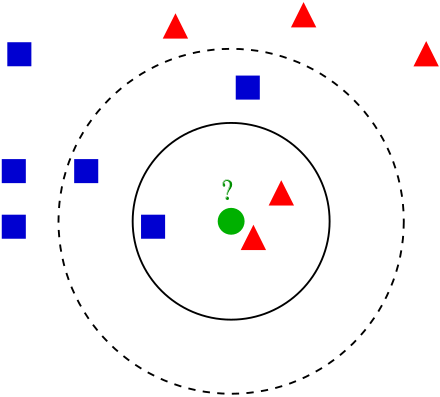

### Now we can classify using the model

### Теперь можем классифицировать:

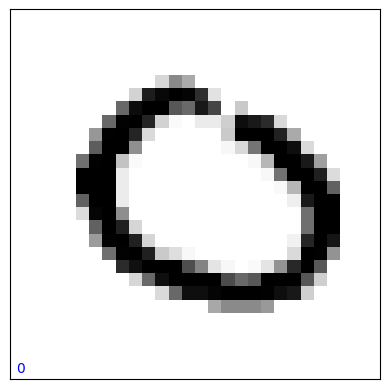

In [ ]:
No = 999
Img = X_test[No, :]
dig = y_test[No]
draw_digit(Img, dig)

In [ ]:
model.predict([Img])

array([0], dtype=int8)

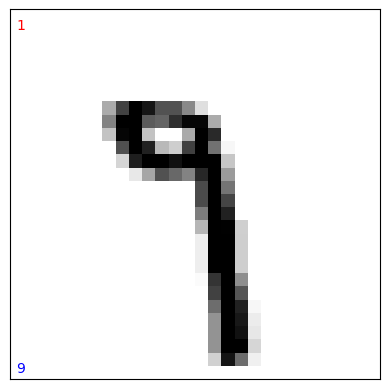

In [ ]:
No = 0
Img = X_test[No, ]
dig = y_test[No]
dig_pred = model.predict([Img])[0]
draw_digit(Img, dig, dig_pred)

### Check the quality of the model

### Проверяем качество классификатора

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
y_train.shape

(6000,)

In [ ]:
y_train != y_train_pred

array([False, False,  True, ...,  True,  True, False])

In [ ]:
y_test != y_test_pred

array([ True, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

Errors for train and test datasets:

Ошибки на обучающей и тестовой выборках:

In [ ]:
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.05383333333333333, 0.072)

We can do the same by the following way:

Можно так:

Calculate the accuracy:

In [ ]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9461666666666667, 0.928)

Compute the error:

In [ ]:
1 - model.score(X_test, y_test)

0.07199999999999995

### Confusion matrix

### Матрица рассогласования:

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

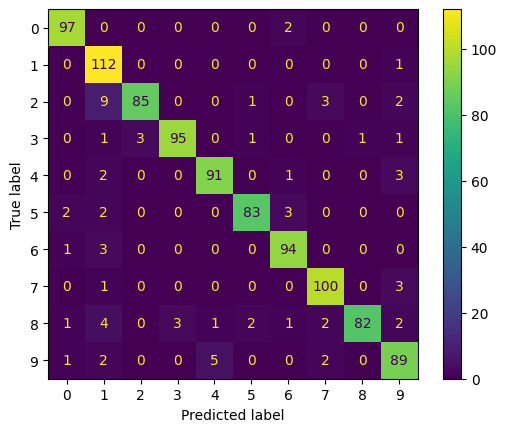

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Other quality metrics:

### Другие метрики качества:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.82      0.99      0.90       113
           2       0.97      0.85      0.90       100
           3       0.97      0.93      0.95       102
           4       0.94      0.94      0.94        97
           5       0.95      0.92      0.94        90
           6       0.93      0.96      0.94        98
           7       0.93      0.96      0.95       104
           8       0.99      0.84      0.91        98
           9       0.88      0.90      0.89        99

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



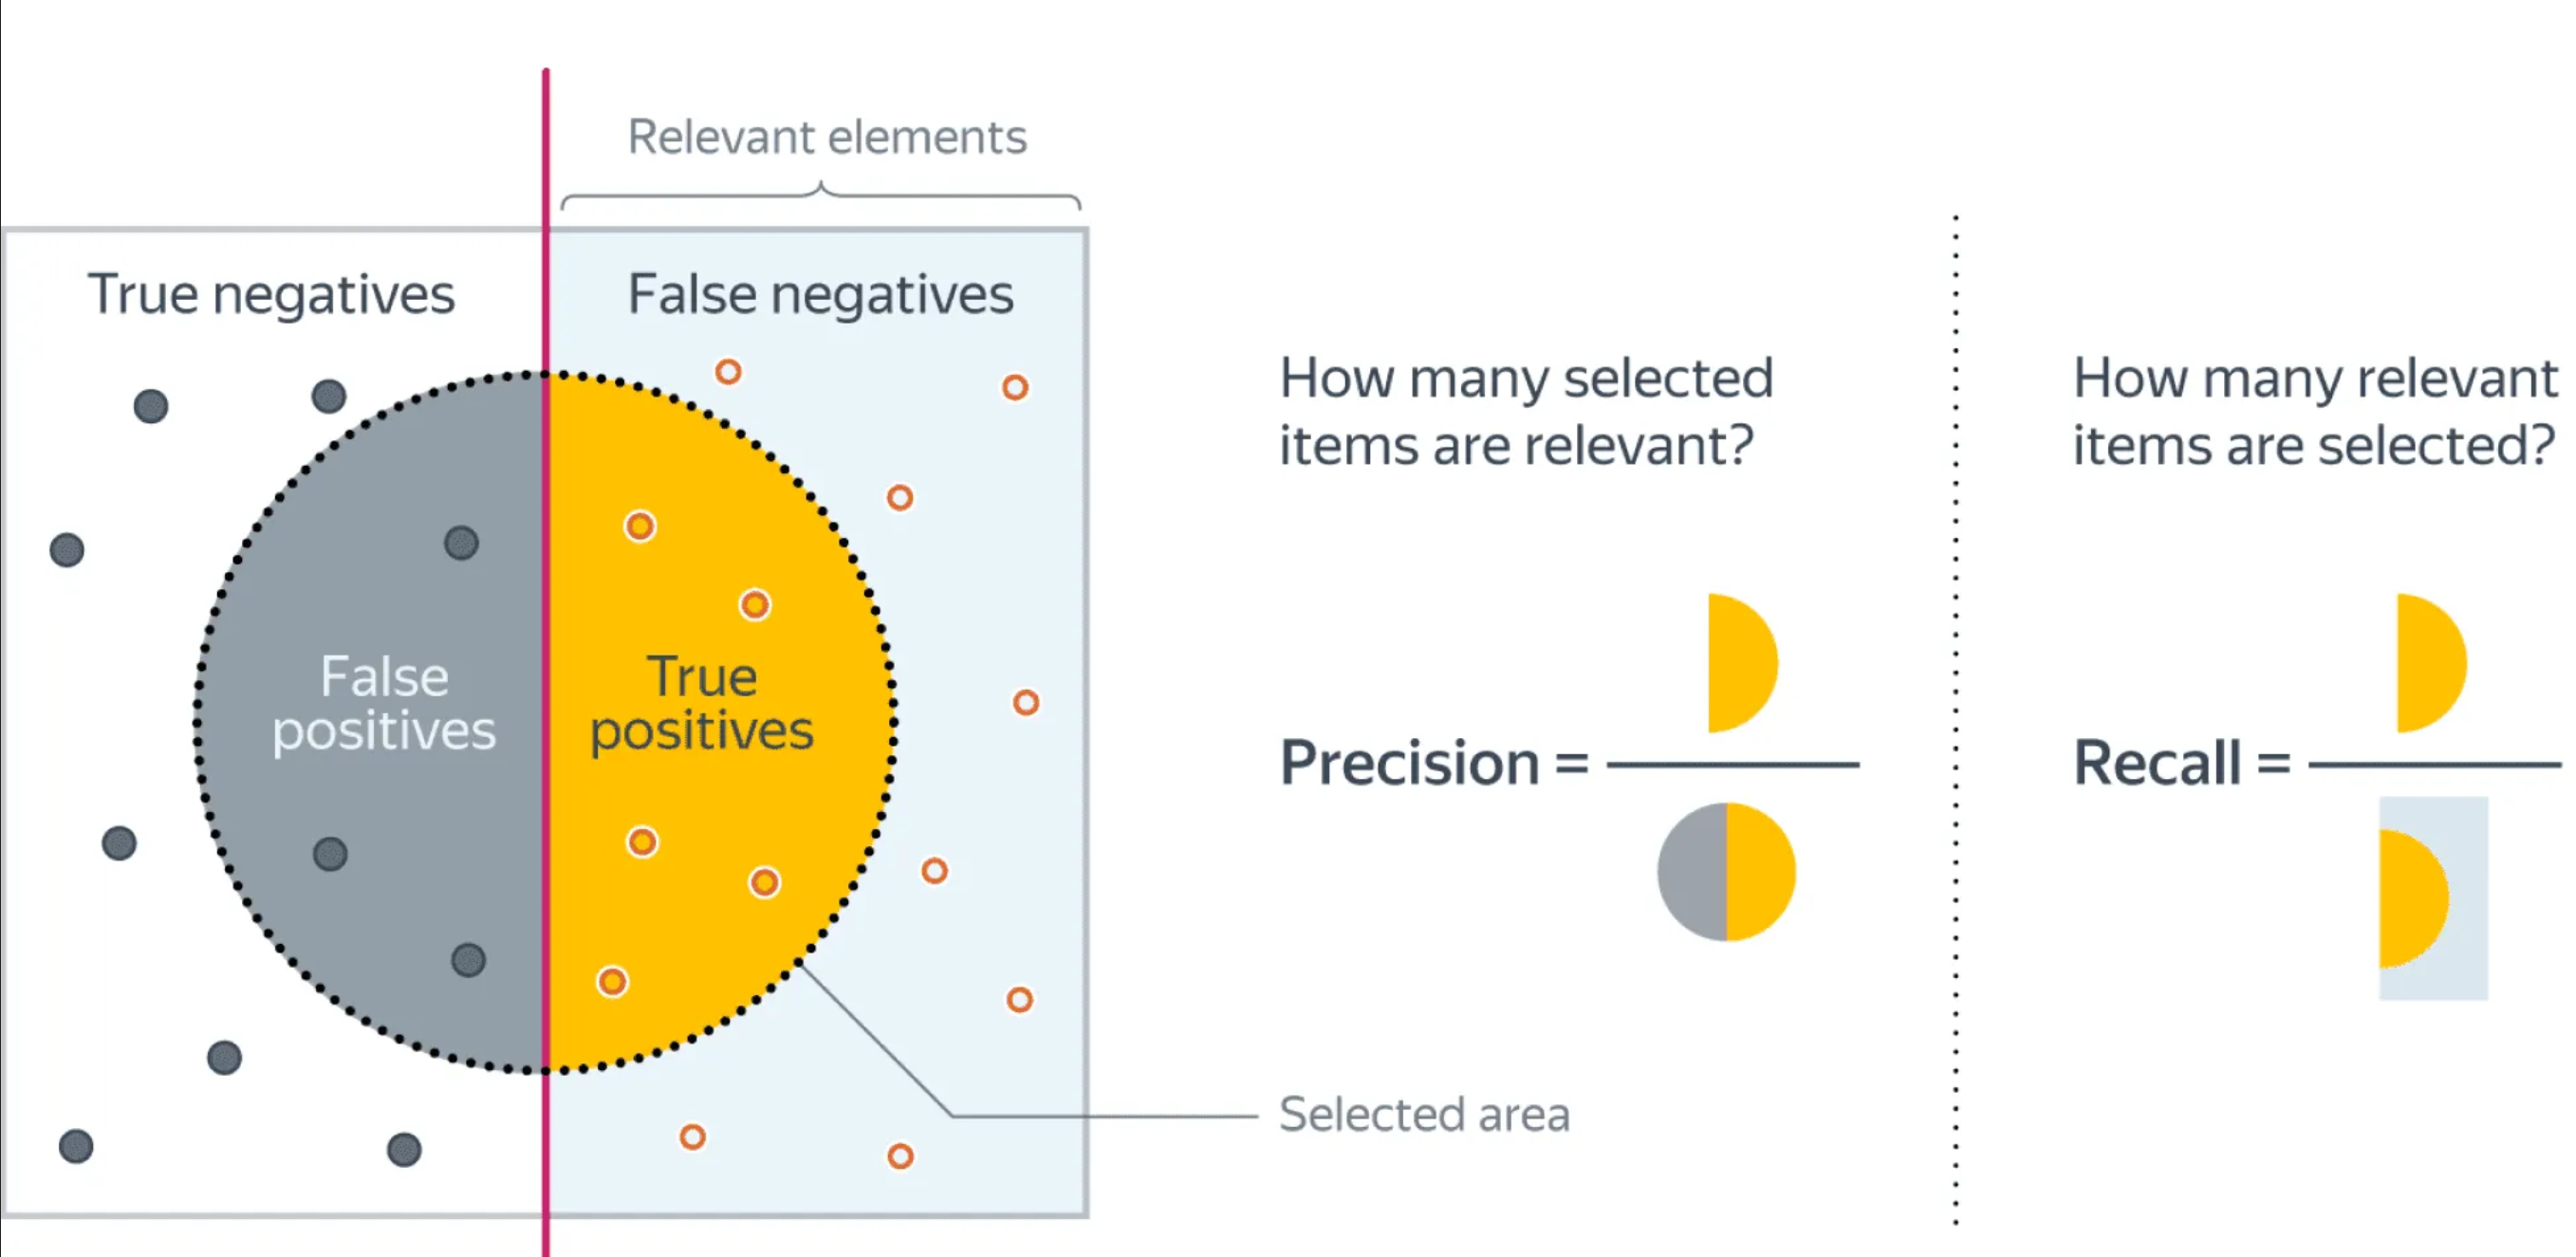

Для бинарной классификации:

$$
\begin{array}{c|c|c|}
    &   f(x)=0 & f(x)=1 \\
\hline
y=0 & {\rm TN} & {\rm FP} \\
\hline
y=1 & {\rm FN} & {\rm TP} \\
\hline
\end{array}
$$

${\rm TN}$ – true negative

${\rm TP}$ – true positive

${\rm FP}$ – false positive, _ложные тревоги_ (ошибки 1-го рода или $\alpha$-ошибки)

${\rm FN}$ – false negative, _промахи_ (ошибки 2-го рода или $\beta$-ошибки)

${\rm error} = \frac{{\rm FP} + {\rm FN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}}$

${\rm accuracy} = \frac{{\rm TP} + {\rm TN}}{{\rm TP} + {\rm TN} + {\rm FP} + {\rm FN}} = 1 - {\rm error}$

$\alpha = {\rm FPR} = \frac{{\rm FP}}{{\rm TN}+{\rm FP}}$ – ``вероятность'' ошибки 1-го рода (_уровень значимости_)

$\beta = {\rm FNR} = \frac{{\rm FN}}{{\rm FN}+{\rm TP}}$ – ``вероятность'' ошибки 2-го рода

${\rm precision} = \frac{{\rm TP}}{{\rm FP}+{\rm TP}}$ – ``точность'' (не путать с accuracy)

${\rm recall} = {\rm TPR} = \frac{{\rm TP}}{{\rm FN}+{\rm TP}} = 1 - {\rm FNR}$ – _чувствительность_, полнота, отклик (вероятность предсказать отсутствие болезни, при условии, что ее нет)

${\rm TNR} = \frac{{\rm TN}}{{\rm TN}+{\rm FP}} = 1 - {\rm FPR}$ – _специфичность_ (вероятность предсказать болезнь, при условии, что она есть)

$F_1 = 2\cdot\frac{{\rm precision}\cdot{\rm recall}}{{\rm precision}+{\rm recall}}$





- FP is the number of _false positive_ samples (classified erroneously as positive sample)
- FN is the number of _false negative_ samples (classified erroneously as negative sample)
- TP is the number of _true positive_ samples (classified correctly as positive sample)
- TN is the number of _true negativ_ samples (classified correctly as negative sample sample)

### All errors:

### Все ошибки:

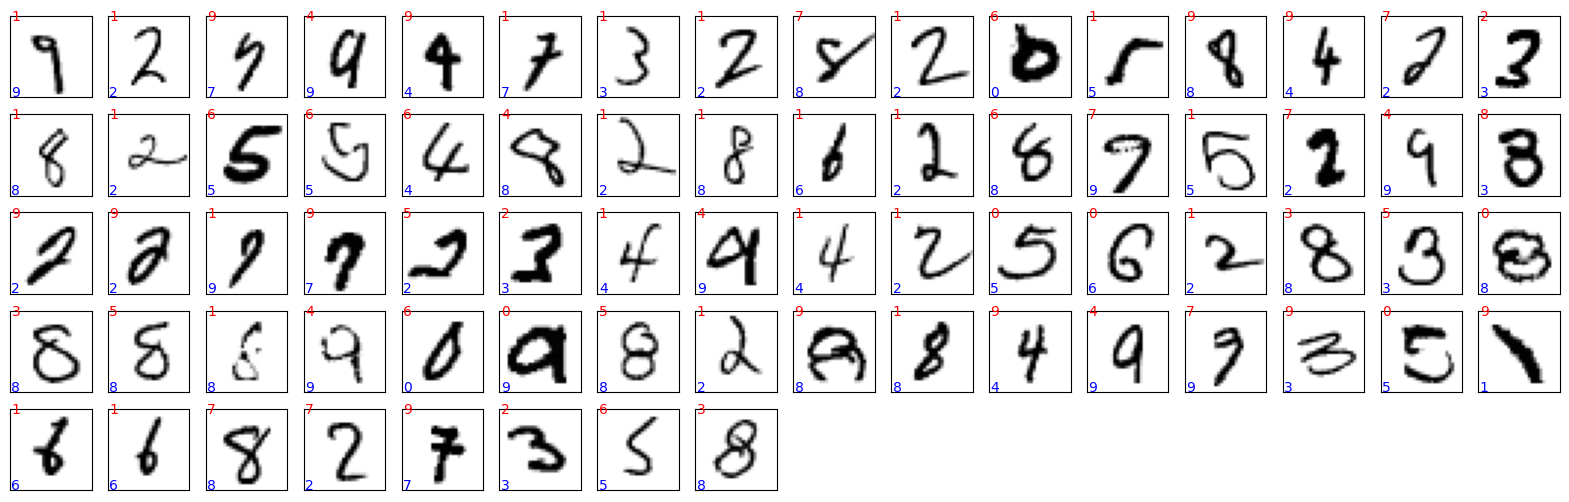

In [ ]:
plt.figure(figsize = (20, 10))
i_subplot = 1
for i in range(N_test):
    Img = X_test[i, :]
    dig = y_test[i]
    dig_pred = model.predict([Img])[0]
    if dig_pred != dig:
        plt.subplot(8, 16, i_subplot)
        draw_digit(Img, dig, dig_pred)
        i_subplot += 1

#### Machine Learning Methods in scikit-learn library

В библиотеке scikit-learn реализована масса алгоритмов машинного обучения.

#### Некоторые алгоритмы машинного обучения, реализованные в scikit-learn:

 Метод                                     |  Класс
-------------------------------------------|--------------------------------------------         
 kNN – $k$ ближайших соседей               | `sklearn.neighbors.KNeighborsClassifier`
 LDA – линейный дискриминантный анализ     | `sklearn.discriminant_analysis.LinearDiscriminantAnalysis`
 QDA – квадратичный дискриминантный анализ | `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis`
 Logistic – логистическая регрессия        | `sklearn.linear_model.LogisticRegression`
 SVC – машина опорных векторов             | `sklearn.svm.SVC`
 Tree – деревья решений                    | `sklearn.tree.DecisionTreeClassifier`
 RF – случайный лес                        | `sklearn.ensemble.RandomForestClassifier`
 ExtrRF – экстремально случайный лес       | `sklearn.ensemble.ExtraTreesClassifier`
 AdaBoost – алгоритм AdaBoost              | `sklearn.ensemble.AdaBoostClassifier`
 GBT – градиентный бустинг деревьев решений| `sklearn.ensemble.GradientBoostingClassifier`
 Нейронные сети                            | `sklearn.neural_network.MLPClassifier`




#### Основные методы классов, реализующих алгоритмы машинного обучения
Все алгоритмы выполнены в виде классов, обладающих по крайней мере следующими методами:



   Метод класса            |  Описание     
 --------------------------|-------------------------------------------------------------
  `fit(X_train, y_train)`              |  обучение (тренировка) модели на обучающей выборке `X_train`, `y_train`
  `predict(X)`             |  предсказание на данных `X`
  `set_params(**params)`   |  установка параметров алгоритма
  `get_params()`           |  чтение параметров алгоритма

 Заметим, что параметры алгоритмов обучения можно задавать как в конструкторе класса, так и с помощью метода `set_params(**params)`.

 #### Таблица наличия/отсутствия методов для основных алгоритмов машинного обучения:

    
   Методы класса               | kNN | LDA | QDA | Logistic | SVC | Tree | RF | AdaBoost | GBT     
 ------------------------------|-----|-----|-----|----------|-----|------|----|----------|------
  `fit(X, y)`                  |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict(X)`                 |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `predict_proba(X)`           |  +  |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `predict_log_proba(X)`       |     |  +  |  +  |    +     |     |  +   | +  |    +     |  +
  `score(X, y)`                |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `decision_function(X)`       |     |  +  |  +  |    +     |  +  |      |    |    +     |  +
  `transform(X)`               |     |  +  |     |    +     |     |  +   | +  |          |  +
  `staged_decision_function(X)`|     |     |     |          |     |      |    |    +     |  +    
  `staged_predict(X)`          |     |     |     |          |     |      |    |    +     |  +
  `staged_predict_proba(X)`    |     |     |     |          |     |      |    |    +     |  +
  `staged_score(X, y)`         |     |     |     |          |     |      |    |    +     |  +
  `set_params(**params)`       |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
  `get_params()`               |  +  |  +  |  +  |    +     |  +  |  +   | +  |    +     |  +
    
    

### Neural methods (MLP  - Multi Layer Perceptron)
### Нейронные сети (MLP - Multi Layer Perceptron)

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30,), random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.03216666666666667, 0.124)

In [ ]:
model = MLPClassifier(hidden_layer_sizes = (1000, 500), random_state = 42)
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(1000, 500), random_state=42)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.071)

### Подбор *гипер*параметров

### Choosing hyperpapameters

Подберем _оптимальное_ значение параметра регуляризации `alpha`

Let's try to find the optimal value for regularization parameter `alpha`

(Можно вместо циклов, написанных руками, использовать `sklearn.model_selection.GridSearchCV` и т.п.)

(Instead of using cycles you can use `sklearn.model_selection.GridSearchCV` etc.)

In [ ]:
alpha_arr = np.logspace(-4, 5, 10)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (30,), random_state = 42, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

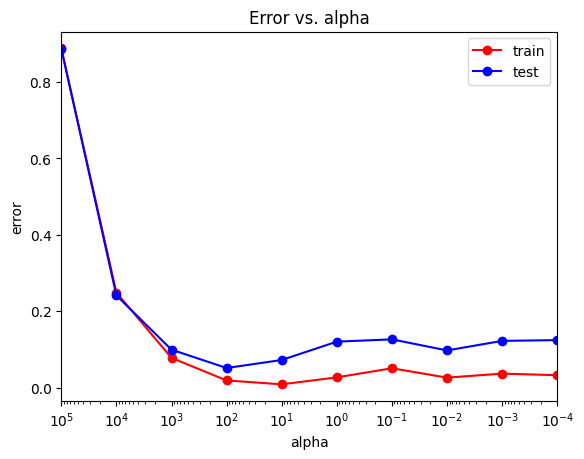

In [ ]:
plt.semilogx(alpha_arr, train_err, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'b-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки:
Minimal errors:

In [ ]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.008333333333333333 0.051


Оптимальное значение `alpha`:

OPtimal value for `alpha` (when the test error is minimal)^

In [ ]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[100.]


In [ ]:
alpha_opt = alpha_opt[0]

### Классификатор при найденном _оптимальном_ значении `alpha`:

### Classifier for optimal value of `alpha`

Повторим обучение:

Repeat the training

In [ ]:
for r in range(1, 2):
    mlp_model = MLPClassifier(hidden_layer_sizes = (30,), random_state = r, alpha = alpha_opt)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    #print(np.mean(y_train != y_train_pred))
    print(f"r={r} acc={100-100*np.mean(y_test != y_test_pred)}%")

r=1 acc=95.0%


### Support vector machine

### Машина опорных векторов

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.016833333333333332, 0.041)

In [ ]:
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.089)

In [ ]:
model = SVC(kernel = 'poly')
model.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.014666666666666666, 0.052)

### Логистическая регрессия

### Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)

(0.0, 0.128)

In [ ]:
%%time
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=500, n_jobs=-1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean((1-np.mean(y_test != y_test_pred))*100)

CPU times: user 104 ms, sys: 96.9 ms, total: 201 ms
Wall time: 7.19 s


87.2

In [ ]:
model = LogisticRegression(penalty='l1',solver='saga',max_iter=500, n_jobs=-1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean((1-np.mean(y_test != y_test_pred))*100)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


88.7

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(random_state=0, n_jobs=-1)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean((1-np.mean(y_test != y_test_pred))*100)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


88.7

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean((1-np.mean(y_test != y_test_pred))*100)

78.0

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=4,random_state=0)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
np.mean((1-np.mean(y_test != y_test_pred))*100)

79.80000000000001

In [ ]:
from sklearn import tree
tree.export_text(model)

'|--- feature_461 <= 0.50\n|   |--- feature_378 <= 17.50\n|   |   |--- feature_597 <= 3.50\n|   |   |   |--- feature_514 <= 5.50\n|   |   |   |   |--- feature_651 <= 18.00\n|   |   |   |   |   |--- feature_405 <= 101.00\n|   |   |   |   |   |   |--- feature_152 <= 36.00\n|   |   |   |   |   |   |   |--- feature_348 <= 253.50\n|   |   |   |   |   |   |   |   |--- feature_570 <= 22.00\n|   |   |   |   |   |   |   |   |   |--- feature_581 <= 77.00\n|   |   |   |   |   |   |   |   |   |   |--- class: 7\n|   |   |   |   |   |   |   |   |   |--- feature_581 >  77.00\n|   |   |   |   |   |   |   |   |   |   |--- class: 7\n|   |   |   |   |   |   |   |   |--- feature_570 >  22.00\n|   |   |   |   |   |   |   |   |   |--- class: 5\n|   |   |   |   |   |   |   |--- feature_348 >  253.50\n|   |   |   |   |   |   |   |   |--- class: 9\n|   |   |   |   |   |   |--- feature_152 >  36.00\n|   |   |   |   |   |   |   |--- class: 2\n|   |   |   |   |   |--- feature_405 >  101.00\n|   |   |   |   |   | 

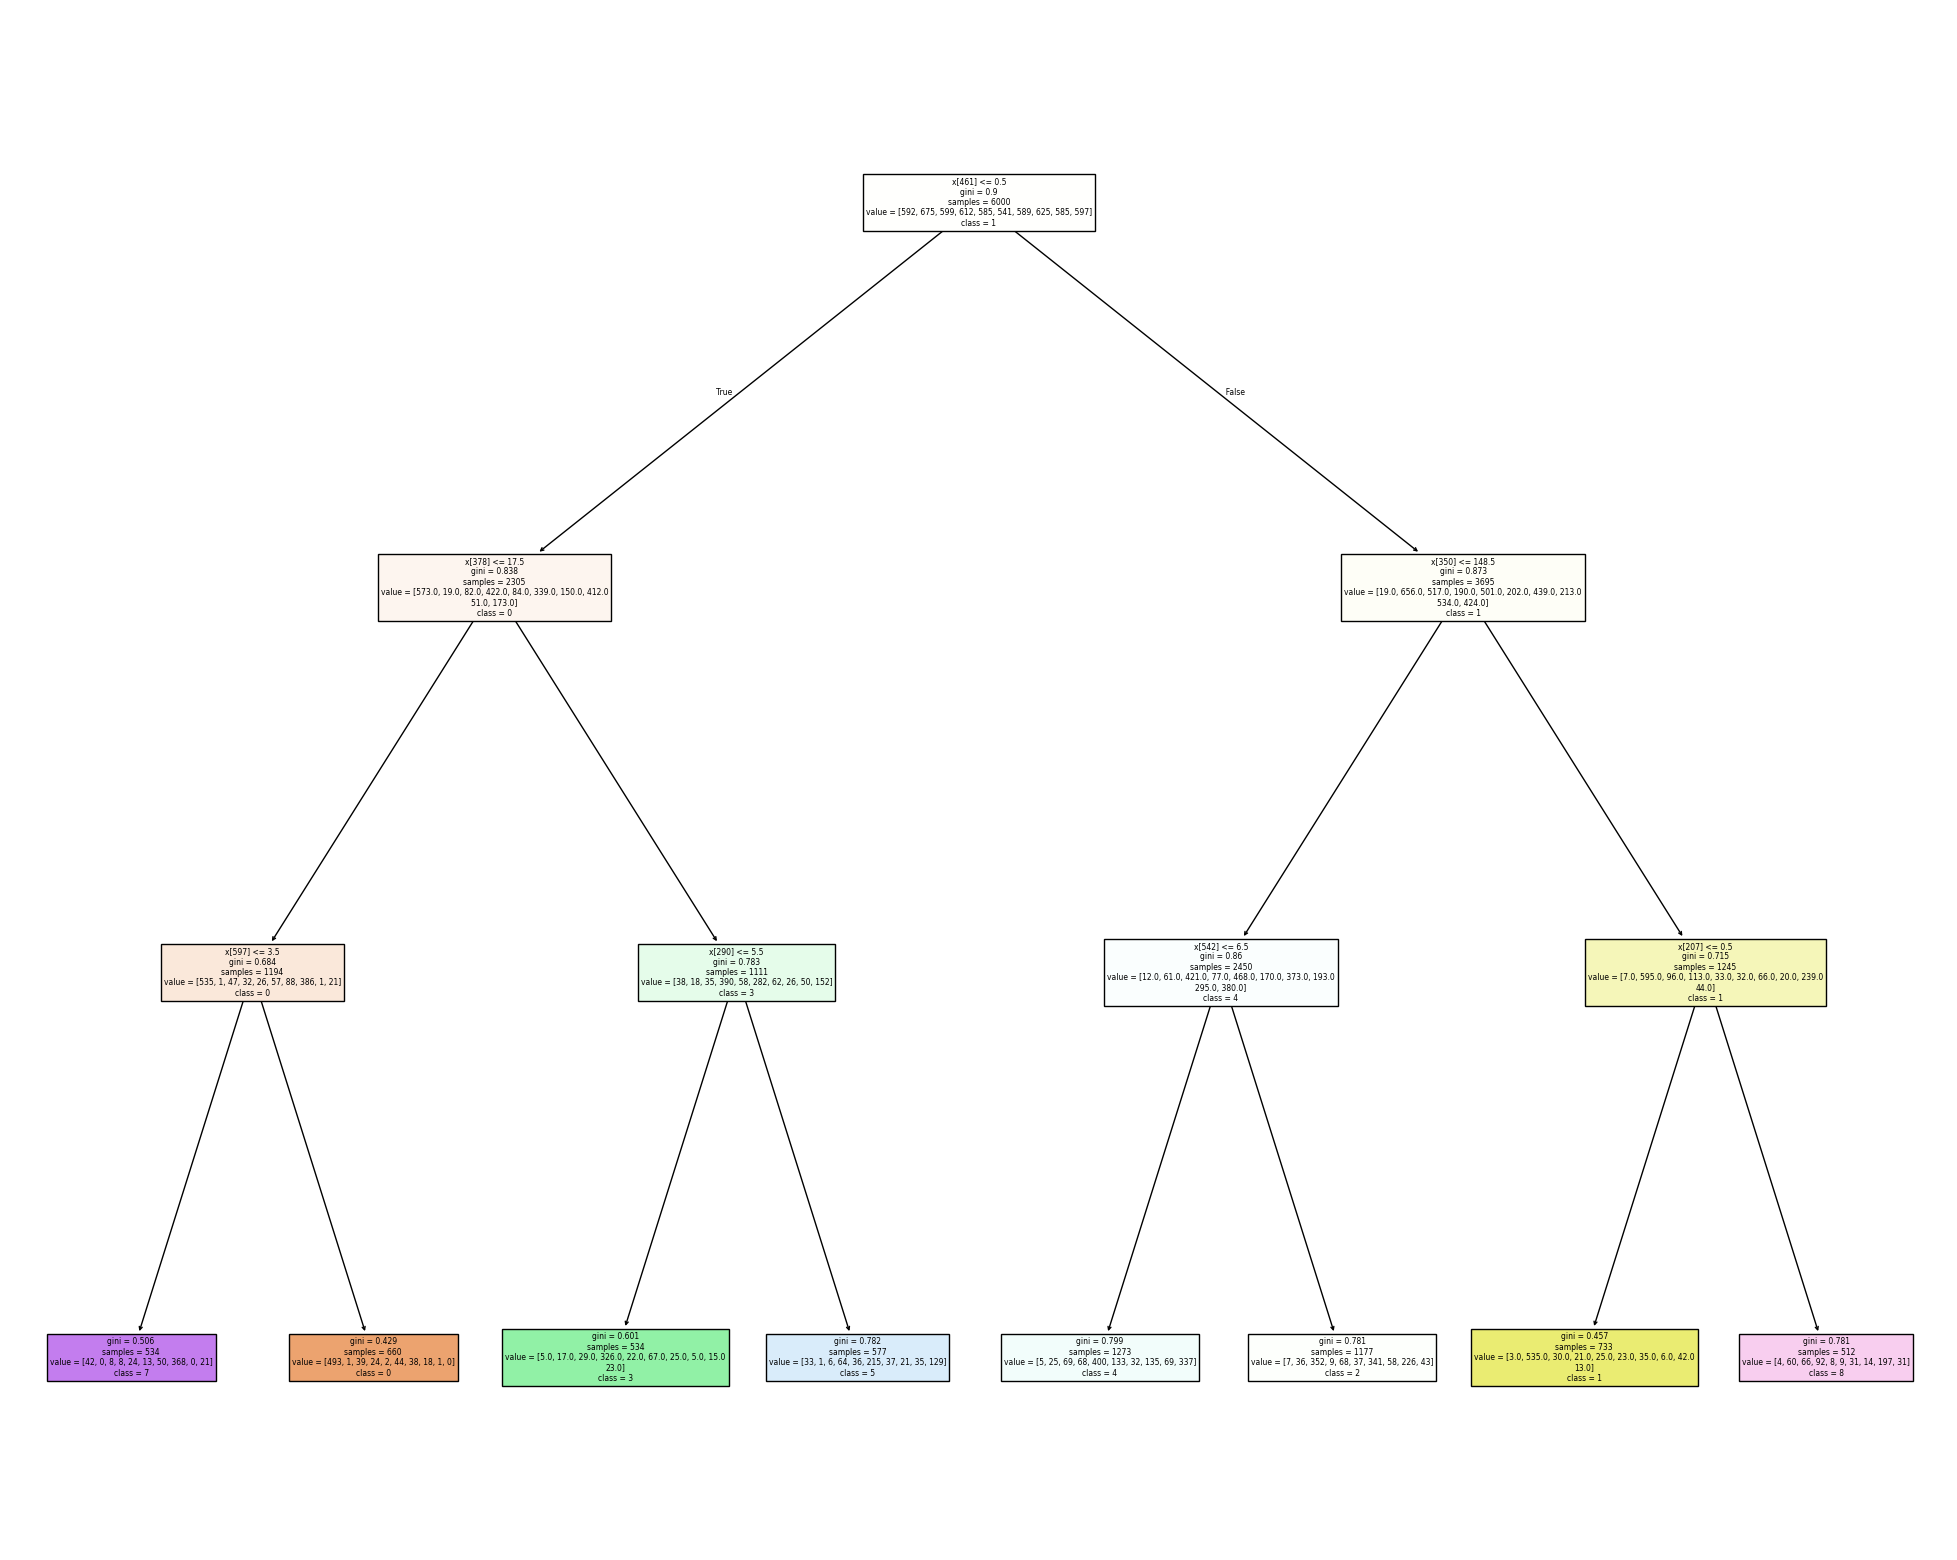

In [ ]:
from sklearn.tree  import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(X_train, y_train)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, class_names = [str(i) for i in range(10)], filled=True)

In [ ]:
model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=4,random_state=0)
model.fit(X_train, y_train)
dtPreds = model.predict(X_test)
model = LogisticRegressionCV(random_state=0, n_jobs=-1)
model.fit(X_train, y_train)
lrPreds = model.predict(X_test)
model = KNeighborsClassifier(n_neighbors = 7, n_jobs=-1)
model.fit(X_train, y_train)
knnPreds = model.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
model = KNeighborsClassifier(n_neighbors = 7, n_jobs=-1)
model.fit(X_train, y_train)
knnProbaPreds = model.predict_proba(X_test)

In [ ]:
knnProbaPreds[0]

array([0.        , 0.14285714, 0.        , 0.        , 0.14285714,
       0.        , 0.        , 0.42857143, 0.        , 0.28571429])

In [ ]:
def getPreds(i):
    return [dtPreds[i],lrPreds[i],knnPreds[i]]

In [ ]:
indexesMistakes = np.array([i for i in range(len(dtPreds))])[dtPreds!=y_test]
for i in indexesMistakes:
    print(str(getPreds(i))+" "+str(y_test[i]))

[1, 5, 7] 9
[1, 3, 2] 2
[6, 5, 5] 5
[5, 4, 4] 4
[3, 4, 9] 7
[5, 0, 0] 0
[6, 6, 9] 8
[4, 4, 4] 9
[8, 4, 4] 4
[8, 4, 9] 4
[9, 6, 6] 6
[6, 8, 5] 5
[4, 8, 8] 8
[1, 4, 4] 4
[5, 3, 3] 3
[0, 0, 3] 3
[3, 8, 9] 9
[9, 9, 1] 7
[4, 5, 5] 5
[1, 3, 1] 3
[3, 4, 4] 4
[3, 9, 9] 9
[7, 7, 2] 2
[2, 8, 8] 8
[2, 2, 1] 1
[6, 2, 2] 2
[5, 3, 3] 3
[4, 8, 8] 8
[8, 8, 5] 5
[6, 2, 2] 2
[3, 8, 1] 1
[6, 7, 7] 8
[0, 8, 8] 8
[6, 0, 6] 0
[8, 9, 9] 9
[3, 2, 2] 2
[4, 9, 9] 9
[2, 2, 7] 7
[4, 9, 7] 7
[2, 5, 5] 5
[2, 1, 1] 1
[3, 9, 9] 9
[9, 6, 6] 6
[7, 6, 6] 6
[3, 7, 7] 7
[3, 9, 9] 9
[6, 6, 5] 5
[1, 8, 8] 8
[3, 8, 8] 8
[6, 4, 9] 4
[4, 2, 2] 2
[2, 4, 4] 4
[7, 4, 4] 4
[7, 8, 8] 3
[3, 8, 1] 8
[5, 6, 1] 2
[5, 0, 3] 3
[4, 6, 6] 5
[6, 6, 6] 4
[7, 9, 9] 9
[9, 9, 4] 4
[3, 9, 4] 8
[5, 3, 3] 3
[0, 3, 3] 3
[0, 0, 2] 2
[0, 9, 9] 9
[3, 1, 8] 8
[2, 3, 3] 3
[1, 6, 1] 6
[3, 0, 0] 0
[5, 6, 6] 6
[6, 4, 4] 4
[3, 2, 1] 2
[4, 5, 5] 5
[6, 8, 6] 8
[4, 8, 8] 8
[8, 4, 4] 4
[7, 7, 7] 9
[2, 6, 3] 3
[4, 6, 6] 6
[5, 0, 0] 0
[5, 6, 6] 6
[3, 6, 6] 6
[6, 

## Torch

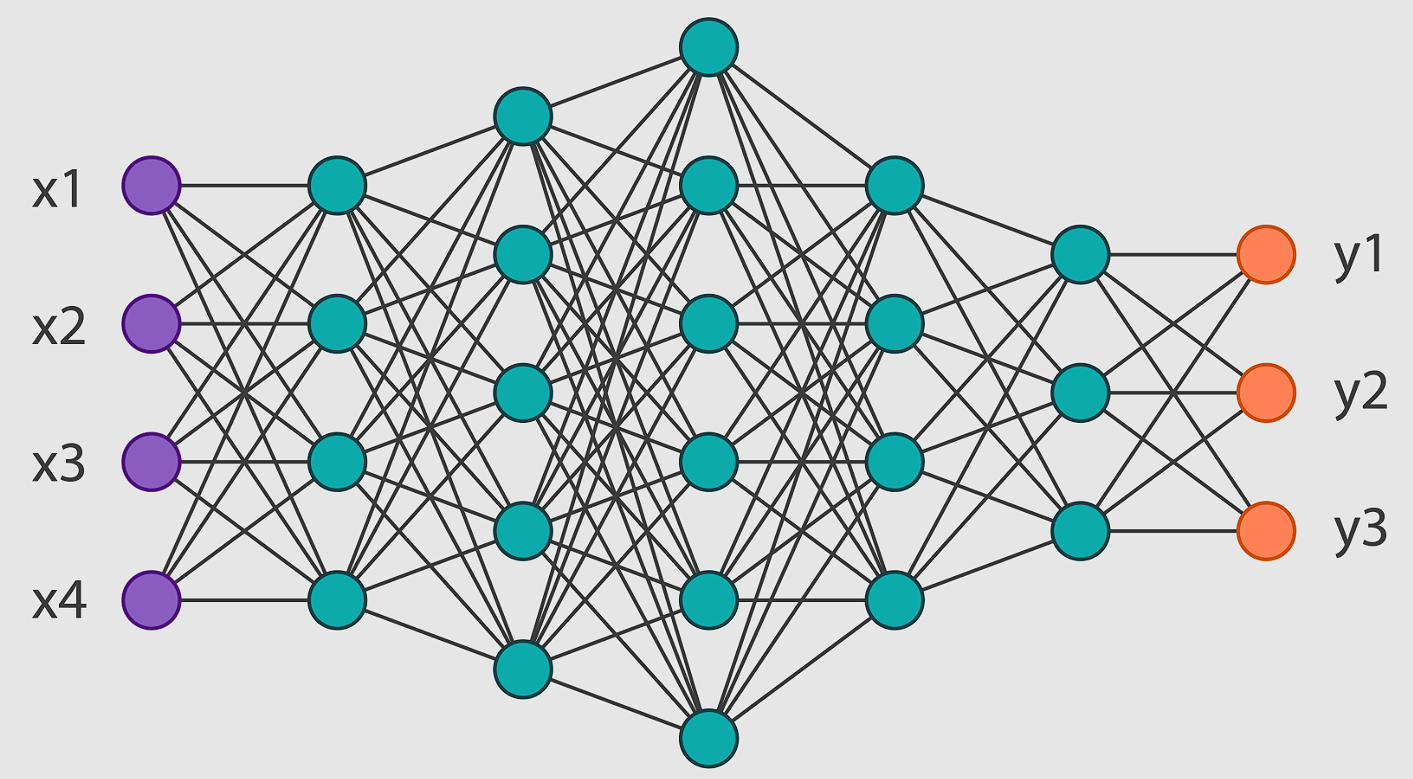

In [ ]:
import torch # библиотека нейронных сетей
import torch.nn as nn # модуль слоёв
import numpy as np

In [ ]:
model = nn.Sequential(
    nn.Linear(d, 50),
    nn.ReLU(),
    nn.Linear(50, 10)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

# Функция обучения (несколько тренировочных эпох)
def train(model, X, y, loss_function, optimizer, batch_size=16, epochs=16):
    X_tensor = torch.Tensor(X)
    y_tensor = torch.LongTensor(y)
    model.train()
    dataset = TensorDataset(X_tensor, y_tensor)
    dataloader = DataLoader(dataset, batch_size = batch_size, shuffle = True)
    for _ in range(epochs):
        losses = []
        for X_batch, y_batch in dataloader:
            logits = model(X_batch)
            loss = loss_function(logits, y_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            losses.append(loss.data.numpy())
        print(np.mean(losses))

In [ ]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
train(model, X_train, y_train, loss_function, optimizer)

1.7509882
0.52348894
0.37918603
0.31493628
0.25747105
0.27496353
0.22614215
0.20312044
0.20683688
0.19378747
0.18017003
0.19197972
0.17531565
0.17287636
0.15721308
0.16720995


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

def print_confusion_matrix(model, X, y):
    model.eval()
    y_pred = model(torch.Tensor(X)).data.numpy().argmax(axis = 1)
    print(confusion_matrix(y, y_pred))
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy = {accuracy}")
    return accuracy

In [ ]:
print_confusion_matrix(model, X_test, y_test)

[[ 95   0   0   1   0   0   2   1   0   0]
 [  0 109   1   0   1   0   0   1   1   0]
 [  0   0  92   3   0   0   1   2   2   0]
 [  0   0   6  90   0   0   2   0   4   0]
 [  0   0   0   0  88   0   4   0   1   4]
 [  1   0   0   4   0  70   7   1   7   0]
 [  1   0   0   0   1   0  96   0   0   0]
 [  0   0   2   0   2   0   0  94   0   6]
 [  1   0   0   5   0   1   2   1  88   0]
 [  0   1   0   1   2   0   0   4   2  89]]
Accuracy = 0.911


0.911

## CNN

In [ ]:
import torch
import torch.nn as nn

In [ ]:
batch_size = 64

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

X_train_tensor = torch.Tensor(X_train).reshape(N_train, 1, 28, 28)
y_train_tensor = torch.LongTensor(y_train)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)

X_test_tensor = torch.Tensor(X_test).reshape(N_test, 1, 28, 28)
y_test_tensor = torch.LongTensor(y_test)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
# Альтернатива
# Можем загрузить непсредственно из torch
from torchvision import datasets, transforms
train_dataset = datasets.MNIST(root='./data/', train=True,  transform=transforms.ToTensor(), download=True)
test_dataset  = datasets.MNIST(root='./data/', train=False, transform=transforms.ToTensor())

from torch.utils.data import DataLoader
# Data Loader (Input Pipeline)
batch_size = 64

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(dataset=test_dataset,  batch_size=batch_size, shuffle=False)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:11<00:00, 897kB/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 128kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:06<00:00, 240kB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.2MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 5), # 24x24
    nn.MaxPool2d(kernel_size = 3), # 8x8
    nn.ReLU(),
    nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 5), # 4x4
    nn.MaxPool2d(kernel_size = 2), # 2x2
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features = 64, out_features = 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=64, out_features=32, bias=True)
  (8): ReLU()
  (9): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
model = nn.Sequential(
    nn.Conv2d(in_channels = 1, out_channels = 8, kernel_size = 3), # 26x26
    nn.MaxPool2d(kernel_size = 2), # 13x13
    nn.ReLU(),
    nn.Conv2d(in_channels = 8, out_channels = 16, kernel_size = 5), # 9x9
    nn.MaxPool2d(kernel_size = 3), # 3x3
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(in_features = 16*3*3, out_features = 32),
    nn.ReLU(),
    nn.Linear(32, 10)
)
model

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (2): ReLU()
  (3): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (4): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
  (5): ReLU()
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=144, out_features=32, bias=True)
  (8): ReLU()
  (9): Linear(in_features=32, out_features=10, bias=True)
)

In [ ]:
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
#loss_function = nn.CrossEntropyLoss()
#optimizer = torch.optim.Adam(model.parameters())
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [ ]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:
        output = model(data)
        test_loss += loss_function(output, target).data
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
for epoch in range(32):
    train(epoch + 1)
    test()

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.300328
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.642134
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.267334
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.388020
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.282321
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.263627
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.199079
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.188938
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.172449
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.161828

Test set: Average loss: 0.1239, Accuracy: 9604/10000 (96.04%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.053164
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.170685
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.185897
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.067002
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.157774
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.123471
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.044543
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.086246
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.12722

In [ ]:
def print_confusion_matrix(loader):
    model.eval()

    confusion_matrix = torch.zeros(10, 10, dtype=torch.int)
    for data, target in loader:
        output = model(data)
        _, preds = torch.max(output, 1)
        for t, p in zip(target.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1
    print(confusion_matrix)
    accuracy = confusion_matrix.diagonal().sum()/confusion_matrix.sum()
    print(f"Accuracy = {100*accuracy:.2f}%")

In [ ]:
print_confusion_matrix(test_loader)

tensor([[ 977,    0,    0,    0,    0,    0,    1,    2,    0,    0],
        [   2, 1129,    0,    2,    0,    0,    0,    1,    1,    0],
        [   0,    2, 1022,    2,    0,    0,    0,    5,    1,    0],
        [   0,    0,    1, 1004,    0,    1,    0,    2,    2,    0],
        [   0,    0,    0,    0,  973,    0,    0,    1,    1,    7],
        [   2,    0,    0,   10,    0,  872,    1,    0,    3,    4],
        [   4,    2,    0,    1,    2,    6,  940,    0,    2,    1],
        [   0,    3,    1,    1,    0,    0,    0, 1022,    1,    0],
        [   1,    0,    1,    2,    0,    0,    0,    1,  964,    5],
        [   0,    0,    0,    4,    7,    2,    0,    4,    0,  992]],
       dtype=torch.int32)
Accuracy = 98.95%


In [ ]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00
